<a href="https://colab.research.google.com/github/forexms78/AI-05-/blob/main/%EB%AF%B8%EC%85%984_2%ED%8C%80_%EB%B0%95%EB%B3%91%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from urllib.request import urlretrieve; urlretrieve("https://raw.githubusercontent.com/c0z0c/jupyter_hangul/refs/heads/beta/helper_c0z0c_dev.py", "helper_c0z0c_dev.py")
import helper_c0z0c_dev as helper

🌐 https://c0z0c.github.io/jupyter_hangul
ℹ️ NumPy 2.0.2 (v2.x+): 호환성 모드 적용됨
Mounted at /content/drive
✅ 설정 완료: 한글 폰트, plt 전역 등록, pandas 확장, 캐시 기능
pd commit 저장 경로 = /content/drive/MyDrive


포트루칼 은행이 전화 텔레마케팅을 통해 정기 예금 상품을 홍보한 결과 어떠한 고객이 정기 예금에 가입할 가능성이 높은지 컬럼에 있는 고객 정보와 마케팅 정보를 활용하여 y컬럼을 예측하는 모델을 만들기

| 컬럼명         | 설명                                  |
|----------------|---------------------------------------|
| age            | 나이 (숫자)                           |
| job            | 직업 (범주형)                         |
| marital        | 결혼 여부 (범주형)                    |
| education      | 교육 수준 (범주형)                    |
| default        | 신용 불량 여부 (범주형)                |
| housing        | 주택 대출 여부 (범주형)                |
| loan           | 개인 대출 여부 (범주형)                |
| contact        | 연락 유형 (범주형)                     |
| month          | 마지막 연락 월 (범주형)                |
| day_of_week    | 마지막 연락 요일 (범주형)              |
| duration       | 마지막 연락 지속 시간, 초 단위 (숫자)  |
| campaign       | 캠페인 동안 연락 횟수 (숫자)           |
| pdays          | 이전 캠페인 후 지난 일수 (숫자)        |
| previous       | 이전 캠페인 동안 연락 횟수 (숫자)      |
| poutcome       | 이전 캠페인의 결과 (범주형)            |
| emp.var.rate   | 고용 변동률 (숫자)                     |
| cons.price.idx | 소비자 물가지수 (숫자)                 |
| cons.conf.idx  | 소비자 신뢰지수 (숫자)                 |
| euribor3m      | 3개월 유리보 금리 (숫자)              |
| nr.employed    | 고용자 수 (숫자)                       |
| y              | 정기 예금 가입 여부 ('yes' 또는 'no') |

컬럼은 크게 3가지 분류로 나눌 수 있습니다 고객 정보, 마케팅 정보, 사회 및 경제 환경
고객 정보 컬럼은 나이, 직업, 결혼상태, 교육수준, 신용불량여부, 주택대출여부, 개인대출여부
마케팅 정보로는 연락유형, 마지막 연락 월, 요일, 통화시간 이번캠패엔에서 연락한 횟수 이전캠페인에서 연락한 회수, 경과횟수, 결과
사회 및 경제 환경으론 고용변동률, 소비자 물가지수, 소비자 신뢰지수 3개월 유리보금리, 고용자수
타겟변수는 y정기예금가입여부

In [6]:
# 데이터 불러오기

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# 분류알고리즘을 사용하면된다 KNN 로지스틱회귀 xboost

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ai05/bank-additional-full.csv',sep=';')

In [8]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


age에 대해선 크게 중요한걸 못느끼는게 최소나의와 최대나이가 크게 벗어나지 않아서 넘어가려고 합니다

duration 에선 통화시간이 0 초인것은 연결되지 않았다고 판단해서 예금을 가입했을 확률이 없다고 판단합니다
4918초는 상당히 오래 통화한것으로 보아 예금에 상당히 많은 관심을 가지고 있다고 판단할 수 있습니다 duration 컬럼은 학습에는 필요하지 않습니다
이유는 통화하기 전에 예금을 가입할지 예측하는것이 때문입니다 duration은 EDA측면에서는 매우 유용하지만 학습에서는 제외합니다

campaign같은 경우는 연락한 횟수입니다 전화를 많이걸었다는뜻은 전화를 받지않아서 여러번 걸었다는 뜻으로 해석할 수 있습니다

pdays 이전캠페인 후 현재 캠페인까지의 경화한 일수 pday같은 경우는 999는 새로운 고객이라고 볼 수 있습니다 시간이 경과된걸 알 수 없기때문입니다
999값을 를 처리할때 2가지로 볼 수있습니다
1. boolean 형태로 0과 1을 사용하여 접촉을 했느냐 접촉하지 않았느냐
2. 999데이터를 제외한값을 log화 해서 사용하느냐

previous는 이번캠페인 이전에 고객에게 연락했던 횟수입니다
예를들어 previous 가 0이면  pdays컬럼값은 999가 되어야합니다 전처리 진행시 이값에 위배되는 값이 있는지 파악해야합니다 이컬럼이 1이상이면 과거 은행에 캠페인에 참여한 이력이 있다는 말입니다 pday랑 다르게 횟수인 점을 확인해야합니다

emp.var.rate는 고용 변동률을 나타냅니다 양수면 고용이 증가하고 음수면 고용의 감소를 나타냅니다 고용률이 높을때 투자자들이 예금 가입할 확률에 대해서 알아볼 필요성과 그 반대의 상황도 확인해보기 좋을거 같습니다

price.idx는 물가 지수를 나타내며 기준은 100을 기준으로합니다 92이라는 숫자는 물가지수가 92%나타내는거빈다

conf.idx는 소비자 신뢰지수로써 소비자가 -40% 만큼 경제를 부정적으로 본다는 것을 의미합니다

eruibor3m 금리를 나타냅니다







In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# unknown이 있는값 확인하기

df['job'].value_counts()
df['marital'].value_counts()
df['education'].value_counts()

,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18


In [12]:
# 컬럼분포 확인
# no에 많은 데이터가 있어서 클래스의 불균형이 나올 확률이 높다

df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [13]:
# y n 값을 1과 0으로 바꾸기

df['y'] = df['y'].map({
    'yes':1,
    'no':0
})

print(df['y'].value_counts())

y
0    36548
1     4640
Name: count, dtype: int64


### 유의미한 정보를 확인하기

정기 예금 가입률

1. 마지막 연락 유형 (contact)
2. 월별 (month)
3. 이전 캠페인 결과별 (poutcome)
4. 교육수준별 (education)
5. 직업별 (job)

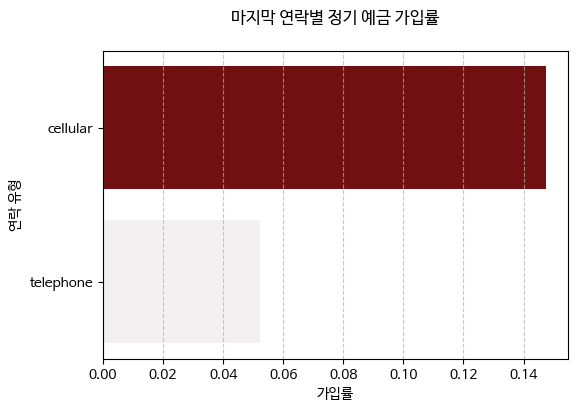

In [14]:
#1. 마지막 연락 유형(contact)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

contact_rate =df.groupby('contact')['y'].mean().sort_values(ascending=False)
contact_rate_df = contact_rate.reset_index()

contact_colors = sns.light_palette('maroon', n_colors=len(contact_rate_df), reverse=True)

plt.figure(figsize=(6,4))
sns.barplot(x='y', y='contact', data=contact_rate_df, palette=contact_colors)
plt.title('마지막 연락별 정기 예금 가입률', pad=20)
plt.xlabel('가입률')
plt.ylabel('연락 유형')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

그래프를 보았을때 </br>
전화기로 전화하는거보다 휴대폰으로 전화하는게 </br>
예금 가입률이 더 높은것으로 볼 수 있습니다

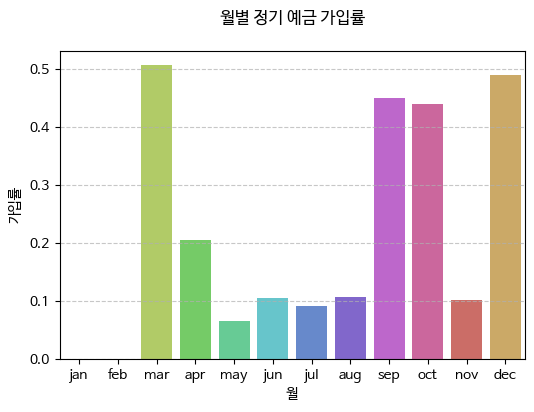

In [15]:
# 2. 월별(month)

month_rate = df.groupby('month')['y'].mean().sort_values(ascending=False)
month_rate_df = month_rate.reset_index()

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_rate_df['month'] = pd.Categorical(month_rate_df['month'], categories=month_order, ordered=True)
month_rate_df = month_rate_df.sort_values('month')

month_colors = sns.color_palette('hls',n_colors=len(month_rate_df))

plt.figure(figsize=(6,4))
sns.barplot(x='month', y='y', data=month_rate_df, palette=month_colors)
plt.title('월별 정기 예금 가입률', pad=20)
plt.xlabel('월')
plt.ylabel('가입률')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1월 2월에 데이터가 없는걸 확인했고</br>
3월 9월 10월 12월에 가입률이 높은걸 확인했습니다

### 왜 3월 9월 10월 12월에 가입률이 높을까?</br>
인터넷으로 웹서핑해본결과 </br>
3/3 납세자의 날이 있어서 정기예금을 가입한것일까? 하는 의문이듭니다</br>
9월에는 금융적으로 확인할 수 없어서 직장에서의 보너스 (ex.하이닉스 1억 보너스, 삼성전자 보너스 문제)가 껴있지 않을까 생각해봅니다</br>
10월에는 금융의 날이라고해서 10월 마지막 화요일이라고 확인했는데 이날 은행측에서 프로모션을 진행하지 않았을까하는 생각이 듭니다</br>
12월에는 연말 소비를 많이하는 시즌이지만 그만큼 저축도 많다고 생각할 수 있을거 같습니다

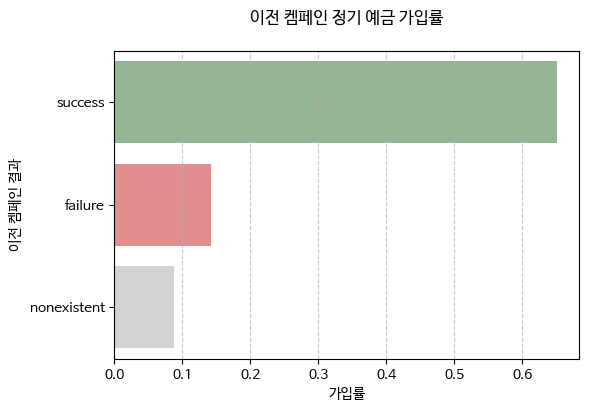

In [16]:
# 3. 이전 캠페인 결과 (poutcome)

poutcome_rate = df.groupby('poutcome')['y'].mean().sort_values(ascending=False)
poutcome_rate_df = poutcome_rate.reset_index()

poutcome_palette = {'success' : 'darkseagreen', 'failure' : 'lightcoral', 'nonexistent':'lightgrey'}

plt.figure(figsize=(6,4))
sns.barplot(x='y', y='poutcome', data=poutcome_rate_df, palette=poutcome_palette)
plt.title('이전 켐페인 정기 예금 가입률',  pad=20)
plt.xlabel('가입률')
plt.ylabel('이전 켐페인 결과')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

그래프로 보았을대 이전 캠페인에서도 가입한 고객이 다시 가입할 확률이 압도적으로 높았습니다</br>
이전 캠패인에 실패한 고객이 한번도 가입한적 없는 고객보다 가입할 확률이 높은것으로보아 캠페인에 실패해도 여러번 도전하는것은 의미가 있을거 같다는 생각을합니다


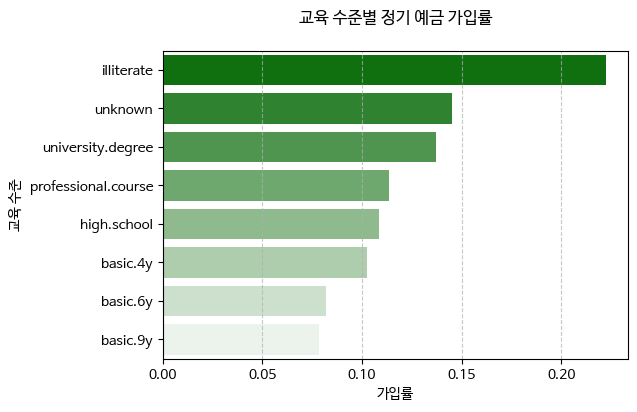

In [17]:
# 4. 교육수준별 (education)

education_rate = df.groupby('education')['y'].mean().sort_values(ascending=False)
education_rate_df = education_rate.reset_index()

education_colors = sns.light_palette("green", n_colors=len(education_rate_df), reverse=True)

plt.figure(figsize=(6,4))
sns.barplot(x='y', y='education', data=education_rate_df, palette=education_colors)
plt.title('교육 수준별 정기 예금 가입률',  pad=20)
plt.xlabel('가입률')
plt.ylabel('교육 수준')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

위 그래프로 보아 단순 학력으로는 정기예금 가입률에 크게 영향을 끼치지 않는것으로 보입니다

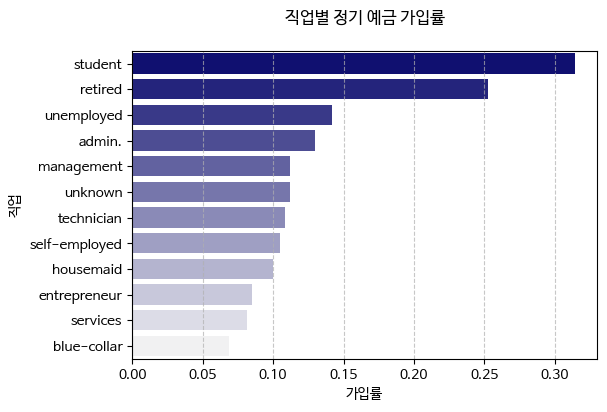

In [18]:
# 5. 직업별 (job)

job_rate = df.groupby('job')['y'].mean().sort_values(ascending=False)
job_rate_df = job_rate.reset_index()

job_colors = sns.light_palette("navy", n_colors=len(job_rate_df), reverse=True)

plt.figure(figsize=(6,4))
sns.barplot(x='y', y='job', data=job_rate_df, palette=job_colors)
plt.title('직업별 정기 예금 가입률',  pad=20)
plt.xlabel('가입률')
plt.ylabel('직업')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

위 그래프로 보아 학생과 은퇴한사람이 정기예금에 많이 가입하는것으로 보입니다 어느정도 직장생활과 거리가 먼 직업들이 예금 가입률이 높은것으로 볼 수있다고 판단하여 직장을 가지지않은 사람을 대상으로 프로모션을 진행하면 좋을거 같습니다

In [19]:
# duration 컬럼을 제거하기
df = df.drop('duration',axis=1)
print(df.info)

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [20]:
# pday 값인 999를 처리하기
# 이전캠페인에 참여하지 않는걸로 파악하여 다른 정보로 분리합니다

import numpy as np

df['contact_previous'] = df['pdays'].apply(lambda x: 0 if x == 999 else 1)
df = df.drop('pdays', axis=1)

unknown 값을 대체하거나 새로운 범주로 인정하거나 결정하는것에서 새로운 범주로 유지하기로 했습니다

전처리중에서 과적합을 피하고 비선형 관계를 더 쉽게 포착하기위해 나이를 그룹화합니다

In [21]:
# 나이별로 구간화하기

bins = [0, 10, 20, 30, 40, 50, 60,100]
labels = ['~9', '~19', '~29', '~39', '~49', '~59','60+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df[['age', 'age_group']].head(10))

   age age_group
0   56       ~59
1   57       ~59
2   37       ~39
3   40       ~49
4   56       ~59
5   45       ~49
6   59       ~59
7   41       ~49
8   24       ~29
9   25       ~29


In [22]:
# 원-핫 인코딩 사용하기
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'age_group']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head(10))

   age  campaign  previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
0   56         1         0           1.1          93.994          -36.4   
1   57         1         0           1.1          93.994          -36.4   
2   37         1         0           1.1          93.994          -36.4   
3   40         1         0           1.1          93.994          -36.4   
4   56         1         0           1.1          93.994          -36.4   
5   45         1         0           1.1          93.994          -36.4   
6   59         1         0           1.1          93.994          -36.4   
7   41         1         0           1.1          93.994          -36.4   
8   24         1         0           1.1          93.994          -36.4   
9   25         1         0           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  contact_previous  job_blue-collar  \
0      4.857       5191.0  0                 0            False   
1      4.857       5191.0  0            

# EDA

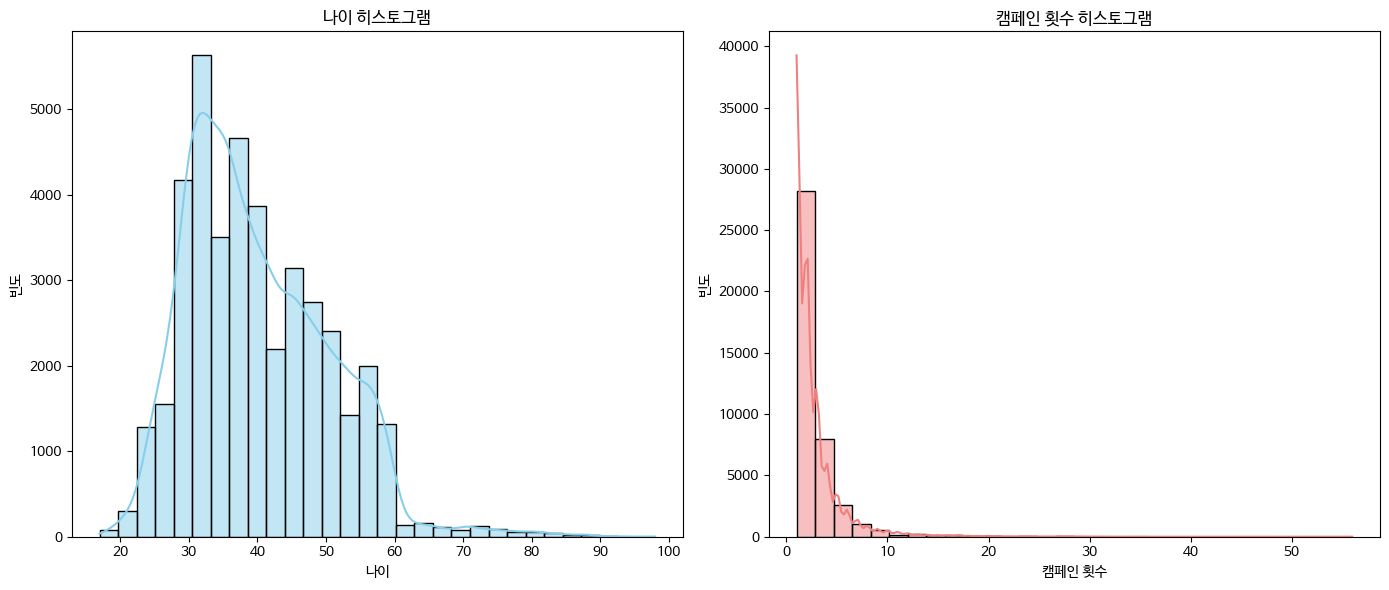

In [23]:
# 히스토그램으로 파악하기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes= plt.subplots(1,2,figsize=(14,6))

sns.histplot(ax=axes[0], data=df, x='age',bins=30,  kde=True, color='skyblue')
axes[0].set_title('나이 히스토그램')
axes[0].set_xlabel('나이')
axes[0].set_ylabel('빈도')

sns.histplot(ax=axes[1], data=df, x='campaign', bins=30,kde=True, color='lightcoral')
axes[1].set_title('캠페인 횟수 히스토그램')
axes[1].set_xlabel('캠페인 횟수')
axes[1].set_ylabel('빈도')

plt.tight_layout()
plt.show()

나이에는 30대에서 40대가 주로 분포해있으며 캠페인 횟수 연락은 0~2회가 가장많이 분포해 있습니다 이로써

나이가 많을수록 캠페인 횟수도 많은지에 대한 가설을 세워볼 수 있습니다.

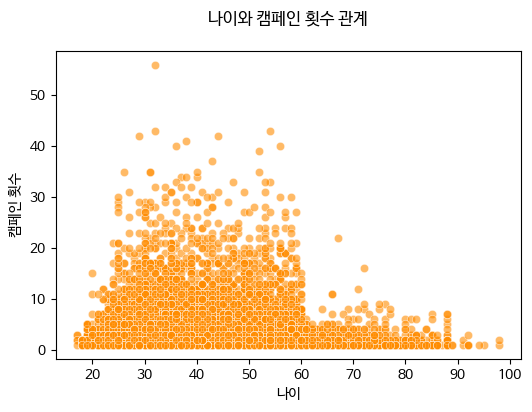

In [24]:
# 나이가 많을수록 캠페인 횟수도 많은가?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='campaign', alpha=0.6, color='darkorange')
plt.title('나이와 캠페인 횟수 관계', pad=20)
plt.xlabel('나이')
plt.ylabel('캠페인 횟수')
plt.show()

그래프로 보았을때 20대 중후반부터 60대 초반까지 캠페인에 연락을 많이 받은것을 확인 할 수 있었고 </br>
캠페인 횟수가 5회 이상인 고객들은 나이와 상관이 크게 없는것으로 확인되었습니다

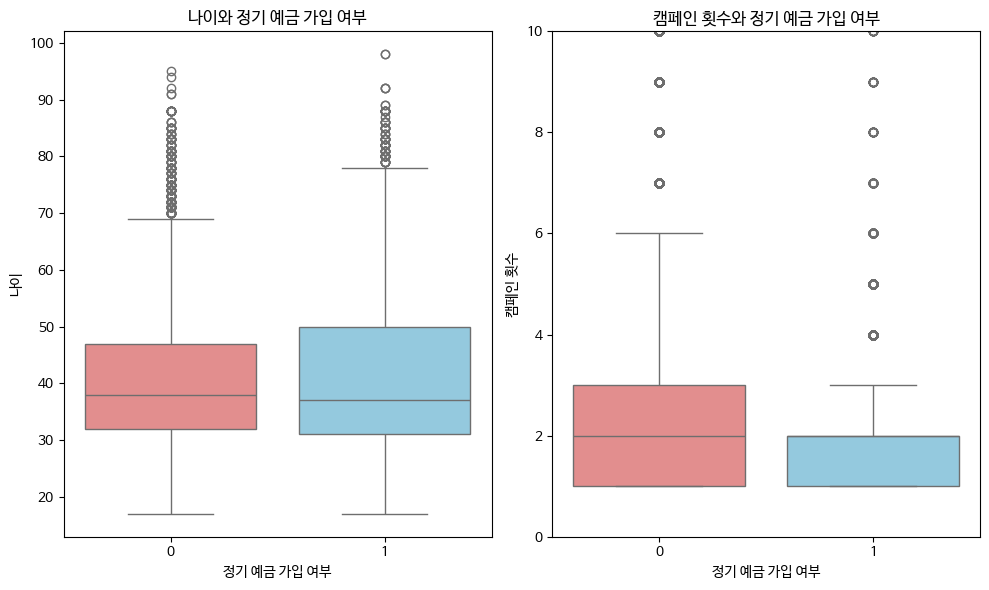

In [25]:
# 박스플롯 확인

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,2,figsize=(10,6))

sns.boxplot(ax=axes[0], data=df, x='y', y='age', palette=['lightcoral', 'skyblue'])
axes[0].set_title('나이와 정기 예금 가입 여부')
axes[0].set_xlabel('정기 예금 가입 여부')
axes[0].set_ylabel('나이')

sns.boxplot(ax=axes[1], data=df, x='y', y='campaign', palette=['lightcoral', 'skyblue'])
axes[1].set_title('캠페인 횟수와 정기 예금 가입 여부')
axes[1].set_xlabel('정기 예금 가입 여부')
axes[1].set_ylabel('캠페인 횟수')
axes[1].set_ylim(0, 10)

plt.tight_layout()
plt.show()

나이의 중앙값은 크게 다르지 않지만 이상값에서 같은 정기예금에 가입한 가입자가 다시 가입할 </br>
확률이 높은것으로 보아 가입하지않은 고객의 나이 분포가 no 즉 0 번에 더 많이 측정되는것으로 </br>
확인할 수 있습니다

두번째 그래프에서는 가입여부와 연락횟수를 알아볼 수 있는 중요한 지표로 생각됩니다</br>
연락을 1번2번만 하여도 충분히 가입을 할 수 있는걸로 확인이 됩니다</br>
이는 적은 횟수만으로도 가입을 유도할 수 있다는것을 파악할 수 있습니다

마지막으로 통화시간과 가입여부 관계는 duration 컬럼이 필요하지만 학습에서 제외하기때문에 EDA에서 제외하기로 했습니

# 머신러닝 모델 구축

In [26]:
# 피쳐와 타겟변수 분리

from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# 모델 학습 및 예측

# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

#정규화 과적합 방지 추가 C 0.1
lr_model = LogisticRegression(solver='liblinear', random_state=42, C=0.1)
lr_model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [28]:
# 랜덤 포레스트 학습

from sklearn.ensemble import RandomForestClassifier

# 트리의 최대깊이를 10으로 제한하고 최소 샘플을 5개로 제한합니다
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [29]:
from sklearn.model_selection import train_test_split

# 기존 데이터를 다시 훈련용과 검증용으로 분할합니다 8:2
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [30]:
from xgboost import XGBClassifier

# XGBoost 학습
xgb_model = XGBClassifier(n_estimators=100,
                          max_depth=5,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [31]:
pip install catboost


In [32]:
from catboost import CatBoostClassifier

# CatBoost 모델
cat_model = CatBoostClassifier(iterations=1000, random_state=42, verbose=0, early_stopping_rounds=50)
cat_model.fit(X_train_sub, y_train_sub, eval_set=[(X_val, y_val)])

# 모델평가

In [58]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

print(f"로지스틱 회귀 - 정확도: {accuracy_score(y_test, lr_pred):.4f} - 재현율: {recall_score(y_test, lr_pred, pos_label=1):.4f} -- F1-점수: {f1_score(y_test, lr_pred, pos_label=1):.4f}")
print(f"랜덤 포레스트 - 정확도: {accuracy_score(y_test, rf_pred):.4f} - 재현율: {recall_score(y_test, rf_pred, pos_label=1):.4f} - F1-점수: {f1_score(y_test, rf_pred, pos_label=1):.4f}")
print(f"XGBoost - 정확도: {accuracy_score(y_test, xgb_pred):.4f} - 재현율: {recall_score(y_test, xgb_pred, pos_label=1):.4f} - F1-점수: {f1_score(y_test, xgb_pred, pos_label=1):.4f}")
print(f"CatBoost - 정확도: {accuracy_score(y_test, cat_pred):.4f} - 재현율: {recall_score(y_test, cat_pred, pos_label=1):.4f} - F1-점수: {f1_score(y_test, cat_pred, pos_label=1):.4f}")

로지스틱 회귀 - 정확도: 0.8978 - 재현율: 0.1957 -- F1-점수: 0.3030
랜덤 포레스트 - 정확도: 0.8984 - 재현율: 0.2193 - F1-점수: 0.3288
XGBoost - 정확도: 0.8958 - 재현율: 0.2717 - F1-점수: 0.3719
CatBoost - 정확도: 0.8975 - 재현율: 0.2321 - F1-점수: 0.3396


모델성능의 정확도에서 xgboost가 높은 점수를 가져갔지만 가입하지 않는 고객이라고 설명하면 80% 넘는 정확도를 가져가기 때문에 정규화 및 하이퍼 파라미터 튜닝을 진행하고 다시 평가해 보기로 했습니다

# 정규화 및 하이퍼파라미터 튜닝

정규화를 통해서 표준화를 진행합니다 정규화시 훈련데이터를 바탕으로 학습하고 훈련 결과를 훈련,테스트 데이터로 모두 변환합니다

In [34]:
# 데이터 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

하이퍼 파라미터 튜닝을 통해 랜덤 서치를 통해서 최고의 f1점수를 찾습니다

In [35]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# 하이퍼 파라미터 튜닝 범위 설정
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0]
}

# XGBoost 모델 생성
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_scaled, y_train)

print("최적의 하이퍼파라미터:", random_search.best_params_)
print("최고 f1점수:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
최적의 하이퍼파라미터: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}
최고 f1점수: 0.3983453701068349


In [38]:
#xgboost를 다시 생성후 학습
from sklearn.metrics import classification_report

best_xgb_model = XGBClassifier(
    subsample=0.8,
    n_estimators=200,
    max_depth=9,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb_model.fit(X_train_scaled, y_train)

best_xgb_pred = best_xgb_model.predict(X_test_scaled)

print(classification_report(y_test, best_xgb_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7303
           1       0.55      0.29      0.38       935

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238



정규화와 하이퍼 파라미터 수정으로 유의미한 튜닝결과를 얻어냈습니다 하지만
데이터 불균형으로 인해서 좋은 점수라고 보기 어렵습니다

# 데이터 불균형 해결(SMOTE)

In [39]:
!pip install imbalanced-learn

In [41]:
#smote 적용

from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(random_state=32)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

전에 진행했던 모델학습을 다시 진행합다

In [59]:
# 모델 학습 및 예측

# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

#정규화 과적합 방지 추가 C 0.1
lr_model_smote = LogisticRegression(solver='liblinear', random_state=42, C=0.1)
lr_model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [60]:
# 랜덤 포레스트 학습

from sklearn.ensemble import RandomForestClassifier

# 트리의 최대깊이를 10으로 제한하고 최소 샘플을 5개로 제한합니다
rf_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_leaf=5)
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [61]:
from sklearn.model_selection import train_test_split

# 기존 데이터를 다시 훈련용과 검증용으로 분할합니다 8:2
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

In [62]:
from xgboost import XGBClassifier

# XGBoost 학습
xgb_model_smote = XGBClassifier(n_estimators=100,
                          max_depth=5,
                          random_state=42,
                          use_label_encoder=False,
                          eval_metric='logloss')
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
from catboost import CatBoostClassifier

# CatBoost 모델
cat_model_smote = CatBoostClassifier(iterations=1000, random_state=42, verbose=0, early_stopping_rounds=50)
cat_model_smote.fit(X_train_smote, y_train_smote, eval_set=[(X_val, y_val)])

결과를 다시 확인합니다

In [65]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

lr_pred_smote = lr_model_smote.predict(X_test)
rf_pred_smote = rf_model_smote.predict(X_test)
xgb_pred_smote = xgb_model_smote.predict(X_test)
cat_pred_smote = cat_model_smote.predict(X_test)

print(f"로지스틱 회귀 - 정확도: {accuracy_score(y_test, lr_pred):.4f} - 재현율: {recall_score(y_test, lr_pred_smote, pos_label=1):.4f} -- F1-점수: {f1_score(y_test, lr_pred_smote, pos_label=1):.4f}")
print(f"랜덤 포레스트 - 정확도: {accuracy_score(y_test, rf_pred):.4f} - 재현율: {recall_score(y_test, rf_pred_smote, pos_label=1):.4f} - F1-점수: {f1_score(y_test, rf_pred_smote, pos_label=1):.4f}")
print(f"XGBoost - 정확도: {accuracy_score(y_test, xgb_pred):.4f} - 재현율: {recall_score(y_test, xgb_pred_smote, pos_label=1):.4f} - F1-점수: {f1_score(y_test, xgb_pred_smote, pos_label=1):.4f}")
print(f"CatBoost - 정확도: {accuracy_score(y_test, cat_pred):.4f} - 재현율: {recall_score(y_test, cat_pred_smote, pos_label=1):.4f} - F1-점수: {f1_score(y_test, cat_pred_smote, pos_label=1):.4f}")

로지스틱 회귀 - 정확도: 0.8978 - 재현율: 0.4246 -- F1-점수: 0.3869
랜덤 포레스트 - 정확도: 0.8984 - 재현율: 0.5701 - F1-점수: 0.4750
XGBoost - 정확도: 0.8958 - 재현율: 0.3968 - F1-점수: 0.4321
CatBoost - 정확도: 0.8975 - 재현율: 0.3733 - F1-점수: 0.4274


smote까지 적용하고 나선 재현율이 비약적으로 f1점수가 모든면에서 높아졌습니다
하지만 최고의 모델성능은 랜덤 포레스트가 0.5701로 가장 높은 점수를 가져갔습니다

# 모델성능 시각화

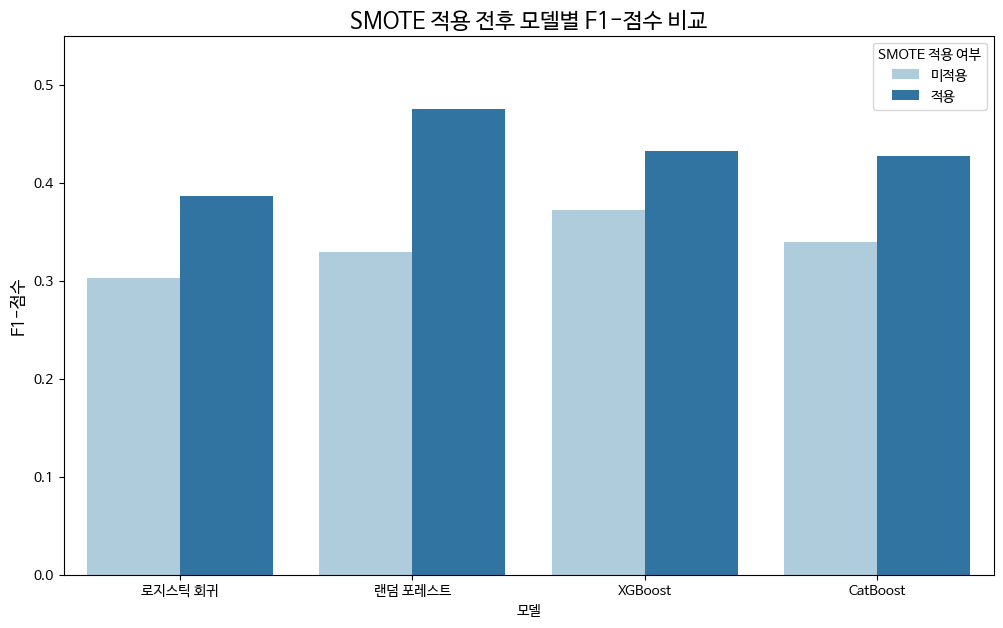

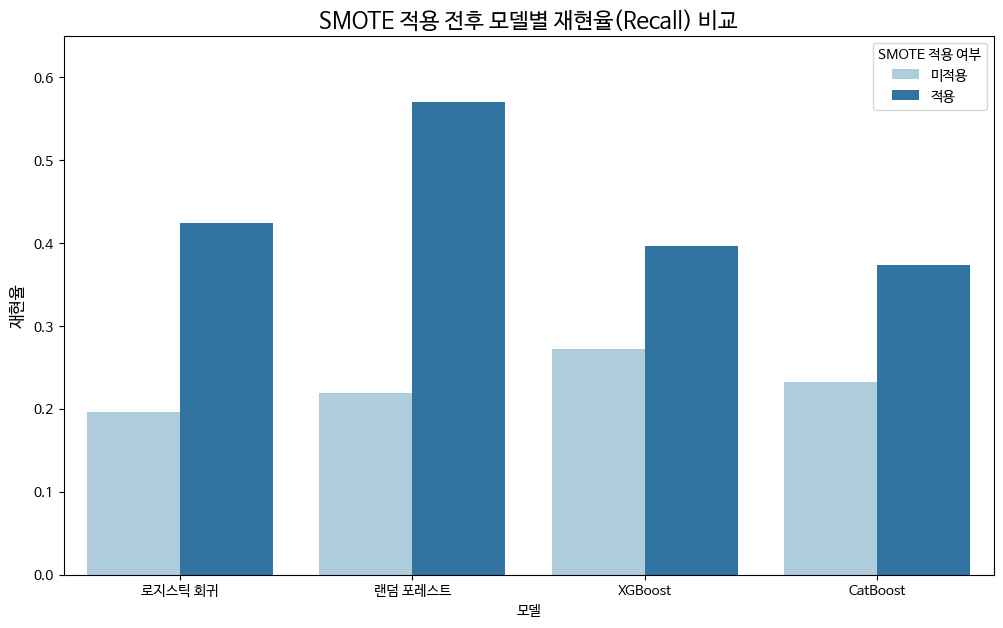

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    '모델': ['로지스틱 회귀', '랜덤 포레스트', 'XGBoost', 'CatBoost',
             '로지스틱 회귀', '랜덤 포레스트', 'XGBoost', 'CatBoost'],
    'F1-점수': [0.3030, 0.3288, 0.3719, 0.3396,
                0.3869, 0.4750, 0.4321, 0.4274],
    '재현율': [0.1957, 0.2193, 0.2717, 0.2321,
               0.4246, 0.5701, 0.3968, 0.3733],
    'SMOTE_적용': ['미적용', '미적용', '미적용', '미적용',
                   '적용', '적용', '적용', '적용']
}

df = pd.DataFrame(data)

# F1-점수 그래프
plt.figure(figsize=(12, 7))
sns.barplot(x='모델', y='F1-점수', hue='SMOTE_적용', data=df, palette='Paired')
plt.title('SMOTE 적용 전후 모델별 F1-점수 비교', fontsize=16)
plt.ylabel('F1-점수', fontsize=12)
plt.ylim(0, 0.55)
plt.legend(title='SMOTE 적용 여부')
plt.show()

# 재현율 그래프
plt.figure(figsize=(12, 7))
sns.barplot(x='모델', y='재현율', hue='SMOTE_적용', data=df, palette='Paired')
plt.title('SMOTE 적용 전후 모델별 재현율(Recall) 비교', fontsize=16)
plt.ylabel('재현율', fontsize=12)
plt.ylim(0, 0.65)
plt.legend(title='SMOTE 적용 여부')
plt.show()